In [6]:
import mglearn
from sklearn.model_selection import train_test_split

X, y = mglearn.datasets.make_wave(n_samples=40)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
X_train[:5]


array([[ 0.08540663],
       [ 1.85038409],
       [-2.41396732],
       [ 1.39196365],
       [-0.35908504]])

In [8]:
from sklearn.neighbors import KNeighborsRegressor

reg = KNeighborsRegressor(n_neighbors=3)
reg.fit(X_train,y_train)
reg

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=3, p=2,
          weights='uniform')

In [14]:
reg.predict(X_test)

array([-0.05396539,  0.35686046,  1.13671923, -1.89415682, -1.13881398,
       -1.63113382,  0.35686046,  0.91241374, -0.44680446, -1.13881398])

In [17]:
print("Testdaten R^2 {:.4f}".format(reg.score(X_test,y_test)))

Testdaten R^2 0.8344


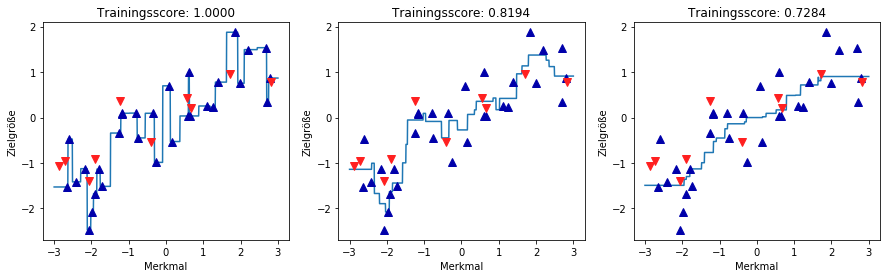

In [40]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

fix, axes = plt.subplots(1,3, figsize=(15,4))
line = np.linspace(-3, 3, 1000).reshape(-1,1)

for n_neighbors, ax in zip([1,3,9], axes):
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(X_train, y_train)
    ax.plot(line, reg.predict(line))
    ax.plot(X_train, y_train, '^', c=mglearn.cm2(0), markersize=8)
    ax.plot(X_test, y_test, 'v', c=mglearn.cm2(1), markersize=8)
    
    ax.set_title("Trainingsscore: {:.4f}".format(reg.score(X_train,y_train)))
    ax.set_xlabel("Merkmal")
    ax.set_ylabel("Zielgröße")